In [111]:


# Analysing the Mean

# Analysing the center point of the dataset - mean, median, mode

# Analysing how the data is spread - variance, standard deviation


# covid dataset

import numpy as np
import pandas as pd


# loading .csv into data frame
data = pd.read_csv("covid-data.csv")
data

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
376623,ZWE,Africa,Zimbabwe,2024-01-31,266265.0,0.0,4.429,5737.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
376624,ZWE,Africa,Zimbabwe,2024-02-01,266265.0,0.0,4.429,5737.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
376625,ZWE,Africa,Zimbabwe,2024-02-02,266265.0,0.0,4.429,5737.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
376626,ZWE,Africa,Zimbabwe,2024-02-03,266265.0,0.0,4.429,5737.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN


In [112]:

# Load the relevant columns

data_col = data.columns.tolist()
data_col


['iso_code',
 'continent',
 'location',
 'date',
 'total_cases',
 'new_cases',
 'new_cases_smoothed',
 'total_deaths',
 'new_deaths',
 'new_deaths_smoothed',
 'total_cases_per_million',
 'new_cases_per_million',
 'new_cases_smoothed_per_million',
 'total_deaths_per_million',
 'new_deaths_per_million',
 'new_deaths_smoothed_per_million',
 'reproduction_rate',
 'icu_patients',
 'icu_patients_per_million',
 'hosp_patients',
 'hosp_patients_per_million',
 'weekly_icu_admissions',
 'weekly_icu_admissions_per_million',
 'weekly_hosp_admissions',
 'weekly_hosp_admissions_per_million',
 'total_tests',
 'new_tests',
 'total_tests_per_thousand',
 'new_tests_per_thousand',
 'new_tests_smoothed',
 'new_tests_smoothed_per_thousand',
 'positive_rate',
 'tests_per_case',
 'tests_units',
 'total_vaccinations',
 'people_vaccinated',
 'people_fully_vaccinated',
 'total_boosters',
 'new_vaccinations',
 'new_vaccinations_smoothed',
 'total_vaccinations_per_hundred',
 'people_vaccinated_per_hundred',
 'peo

In [113]:

# subset of the dataframe

data = data[['iso_code','continent','location','date','total_cases','new_cases']]
data

,iso_code,continent,location,date,total_cases,new_cases
0,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0
1,AFG,Asia,Afghanistan,2020-01-06,NaN,0.0
2,AFG,Asia,Afghanistan,2020-01-07,NaN,0.0
3,AFG,Asia,Afghanistan,2020-01-08,NaN,0.0
4,AFG,Asia,Afghanistan,2020-01-09,NaN,0.0
...,...,...,...,...,...,...
376623,ZWE,Africa,Zimbabwe,2024-01-31,266265.0,0.0
376624,ZWE,Africa,Zimbabwe,2024-02-01,266265.0,0.0
376625,ZWE,Africa,Zimbabwe,2024-02-02,266265.0,0.0
376626,ZWE,Africa,Zimbabwe,2024-02-03,266265.0,0.0


In [114]:
type(data)

pandas.core.frame.DataFrame

In [115]:

# quick look into the data / inspect the dataset


data.head(100)

,iso_code,continent,location,date,total_cases,new_cases
0,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0
1,AFG,Asia,Afghanistan,2020-01-06,NaN,0.0
2,AFG,Asia,Afghanistan,2020-01-07,NaN,0.0
3,AFG,Asia,Afghanistan,2020-01-08,NaN,0.0
4,AFG,Asia,Afghanistan,2020-01-09,NaN,0.0
...,...,...,...,...,...,...
95,AFG,Asia,Afghanistan,2020-04-09,274.0,0.0
96,AFG,Asia,Afghanistan,2020-04-10,274.0,0.0
97,AFG,Asia,Afghanistan,2020-04-11,274.0,0.0
98,AFG,Asia,Afghanistan,2020-04-12,521.0,247.0


In [40]:
# datatypes of the data

data.dtypes

# character data has type of object

iso_code        object
continent       object
location        object
date            object
total_cases    float64
new_cases      float64
dtype: object

In [35]:
#checking the number of columns and rows

# shape is used to find the dimensionality (rows X columns)

data.shape


(376628, 6)

In [116]:

# finding the mean

data_mean = np.mean(data['new_cases'])
data_mean

8965.882998830972

In [72]:


# # self learn / experiment

# import matplotlib.pyplot as plt

# # make sure the new cases column has all/only numeric data

# # to do so,

# data['new_cases'] = pd.to_numeric(data['new_cases'], errors='coerce')
# print(data['new_cases'].unique())

# # we cannot plot the object
# print(data['continent'].dtype)

# # we first need to convert  it into the string
# data['continent'] = data['continent'].astype(str)

# # after conversion
# print(data['continent'].dtype)

# plt.bar(data['continent'],data['new_cases'])
# plt.xlabel('continent')
# plt.ylabel('new cases')
# plt.show()


In [117]:








# checking the Median

# Median -> middle / centre value within a sorted dataset (ascending order)

# half of the dataset is < median

# half of the dataset is > median

# median helps us to figure out the central point of the data

# median is not sensitive to outliers (outliers are unusually high / unusually low data points)


# subset of the dataframe

data = data [['iso_code','continent','location','date','total_cases','new_cases']]
data

,iso_code,continent,location,date,total_cases,new_cases
0,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0
1,AFG,Asia,Afghanistan,2020-01-06,NaN,0.0
2,AFG,Asia,Afghanistan,2020-01-07,NaN,0.0
3,AFG,Asia,Afghanistan,2020-01-08,NaN,0.0
4,AFG,Asia,Afghanistan,2020-01-09,NaN,0.0
...,...,...,...,...,...,...
376623,ZWE,Africa,Zimbabwe,2024-01-31,266265.0,0.0
376624,ZWE,Africa,Zimbabwe,2024-02-01,266265.0,0.0
376625,ZWE,Africa,Zimbabwe,2024-02-02,266265.0,0.0
376626,ZWE,Africa,Zimbabwe,2024-02-03,266265.0,0.0


In [136]:
print(data.head(1000))
data.dtypes

    iso_code continent     location        date  total_cases  new_cases
0        AFG      Asia  Afghanistan  2020-01-05          NaN        0.0
1        AFG      Asia  Afghanistan  2020-01-06          NaN        0.0
2        AFG      Asia  Afghanistan  2020-01-07          NaN        0.0
3        AFG      Asia  Afghanistan  2020-01-08          NaN        0.0
4        AFG      Asia  Afghanistan  2020-01-09          NaN        0.0
..       ...       ...          ...         ...          ...        ...
995      AFG      Asia  Afghanistan  2022-09-26     198283.0        0.0
996      AFG      Asia  Afghanistan  2022-09-27     198283.0        0.0
997      AFG      Asia  Afghanistan  2022-09-28     198283.0        0.0
998      AFG      Asia  Afghanistan  2022-09-29     198283.0        0.0
999      AFG      Asia  Afghanistan  2022-09-30     198283.0        0.0

[1000 rows x 6 columns]


iso_code        object
continent       object
location        object
date            object
total_cases    float64
new_cases      float64
dtype: object

In [133]:
# data_median = np.median(data['new_cases'])
# data_median

# it displays Nan

# To address this, 
# You can exclude NaN values from the calculation by setting the nan_policy parameter to 'omit'.
print(data['new_cases'])


data_median_ignoring_nan = np.nanmedian(data["new_cases"])
data_median_ignoring_nan


0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
376623    0.0
376624    0.0
376625    0.0
376626    0.0
376627    0.0
Name: new_cases, Length: 376628, dtype: float64


0.0

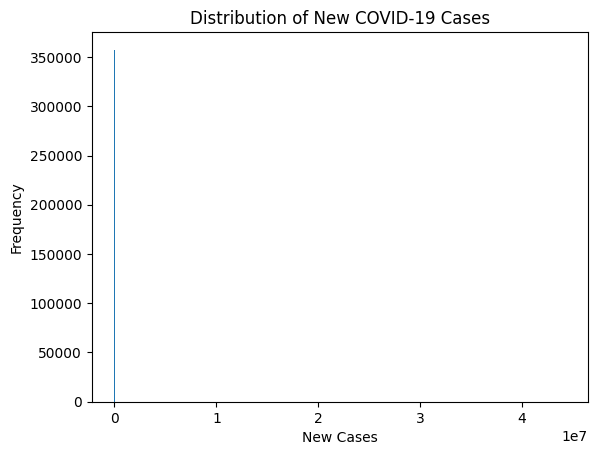

In [134]:
import matplotlib.pyplot as plt

# Plotting a histogram of 'new_cases' column
plt.hist(data['new_cases'], bins=5000)  # Adjust the number of bins as needed
plt.xlabel('New Cases')
plt.ylabel('Frequency')
plt.title('Distribution of New COVID-19 Cases')
plt.show()

(376628, 6)


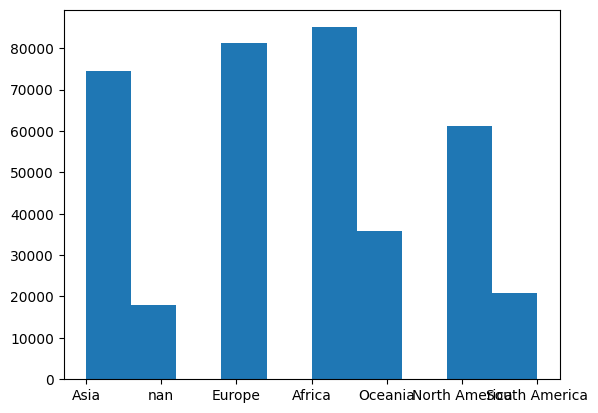

In [140]:

print(data.shape)
plt.hist(data['continent'].astype(str))
plt.show()

In [165]:
# printing the unique values and its count (acts like aggregation)

print("unqiue values" , data['continent'])
unqiue_value_count = data['continent'].value_counts()
unqiue_value_count

unqiue values 0           Asia
1           Asia
2           Asia
3           Asia
4           Asia
           ...  
376623    Africa
376624    Africa
376625    Africa
376626    Africa
376627    Africa
Name: continent, Length: 376628, dtype: object


continent
Africa           85045
Europe           81343
Asia             74435
North America    61178
Oceania          35808
South America    20892
Name: count, dtype: int64

In [166]:
unique_values = unqiue_value_count.index
print("Unique values:", unique_values)
print("Counts:")
print(unqiue_value_count)

Unique values: Index(['Africa', 'Europe', 'Asia', 'North America', 'Oceania',
       'South America'],
      dtype='object', name='continent')
Counts:
continent
Africa           85045
Europe           81343
Asia             74435
North America    61178
Oceania          35808
South America    20892
Name: count, dtype: int64


In [146]:


# identifying the mode of the dataset


import pandas as pd
from scipy import stats

data

,iso_code,continent,location,date,total_cases,new_cases
0,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0
1,AFG,Asia,Afghanistan,2020-01-06,NaN,0.0
2,AFG,Asia,Afghanistan,2020-01-07,NaN,0.0
3,AFG,Asia,Afghanistan,2020-01-08,NaN,0.0
4,AFG,Asia,Afghanistan,2020-01-09,NaN,0.0
...,...,...,...,...,...,...
376623,ZWE,Africa,Zimbabwe,2024-01-31,266265.0,0.0
376624,ZWE,Africa,Zimbabwe,2024-02-01,266265.0,0.0
376625,ZWE,Africa,Zimbabwe,2024-02-02,266265.0,0.0
376626,ZWE,Africa,Zimbabwe,2024-02-03,266265.0,0.0


In [147]:
data_mode = stats.mode(data['new_cases'])
data_mode

ModeResult(mode=0.0, count=326898)

In [148]:
data_mode[0]

0.0

In [150]:
data_mode[0]

0.0

In [154]:


# analysing the dispersion of the dataset


# variance

data

data_variance = np.var(data['new_cases'])
data_variance

59051186771.49356

In [155]:

# standard deviation - 

# derived from the variance - simply the square root of variance

# The
# standard deviation is typically more intuitive because it is expressed in the same units as the dataset,
# for example, kilometers (km). On the other hand, the variance is typically expressed in units larger
# than the dataset and can be less intuitive, for example, kilometers squared (km2).

# we prefer standard_deviation more than variance

data_sd = np.std(data['new_cases'])
data_sd



243004.49948816496

In [168]:

# range of the dataset

# very helpful in analysing the minimum and maximum range of the dataset

data_min = np.min(data['new_cases'])
print(data_min)
data_max = np.max(data['new_cases'])
print(data_max)


# computing the range  is the difference between max and min => ( max - min )


data_range = data_max - data_min

print(data_range)

0.0
44236227.0
44236227.0


total_cases
1.0            1673
26.0           1408
4.0            1317
3.0            1001
17786.0         715
               ... 
641730.0          1
231539.0          1
1011456.0         1
774493392.0       1
301326093.0       1
Name: count, Length: 34241, dtype: int64


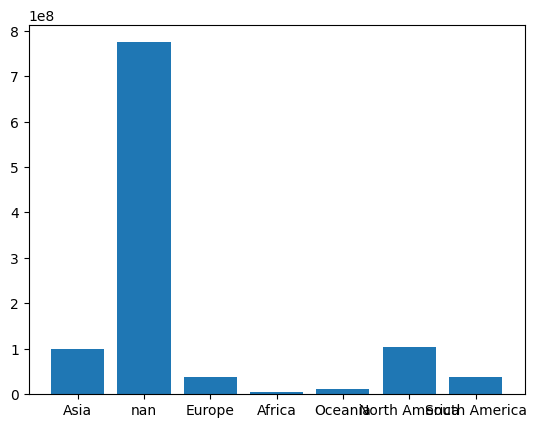

In [180]:

# Converting data to numeric
# nan - coerce
x = data['continent'].astype(str)
y = pd.to_numeric(data['total_cases'], errors='coerce')

plt.bar(x,y)
print(y.value_counts())